In [1]:
from dl import authClient as ac, queryClient as qc, storeClient as sc, helpers
import pylab as plt
import numpy as np
from astropy.io import fits
import matplotlib as mpl
import math

In [2]:
token=ac.login('mgkadrmas')

In [3]:
ra = 284.65
dec = -30.979
radius = 1.0 ## ask about this 

res=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ra)+','+str(dec)+','+str(radius)+')')
df=helpers.utils.convert(res,'table')

In [4]:
gd=np.where(np.isfinite(df['bp_rp']) & np.isfinite(df['phot_g_mean_mag']) & np.isfinite(df['parallax']))
df = df[gd]

In [5]:
## Galactic center
ragc = 17 + (45/60) + (40/3600)
decgc = -(29 +(28.1/3600))
radiusgc = 1.0

resgc=qc.query(token,sql='select * from gaia_dr2.gaia_source where q3c_radial_query(ra,dec,'+str(ragc)+','+str(decgc)+','+str(radiusgc)+')')
gc=helpers.utils.convert(resgc,'table')

In [6]:
gdgc=np.where(np.isfinite(gc['bp_rp']) & np.isfinite(gc['phot_g_mean_mag']))

(-1, 5)

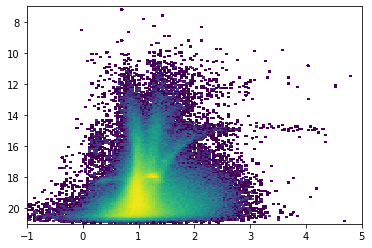

In [7]:
fig = plt.figure()
plt.hist2d(df['bp_rp'],df['phot_g_mean_mag'],(200,200), norm=mpl.colors.LogNorm())
plt.ylim([21,7])
plt.xlim([-1,5])

In [8]:
pd=np.where(np.isfinite(df['pmra']) & np.isfinite(df['pmdec']))

(-100, 100)

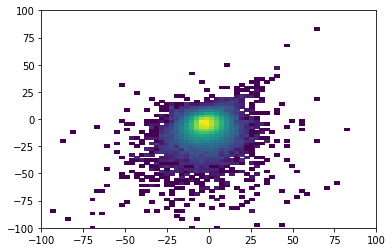

In [9]:
plt.hist2d(df['pmra'][pd],df['pmdec'][pd], (200,200),norm=mpl.colors.LogNorm())
plt.ylim(-100,100)
plt.xlim(-100,100)

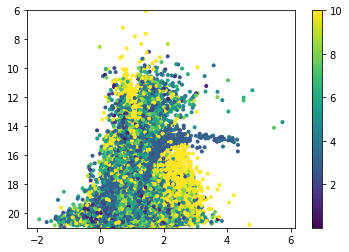

In [10]:
plt.scatter(df['bp_rp'], df['phot_g_mean_mag'], c=((df['pmdec']**2)+(df['pmra']**2))**(1/2), marker = ".", vmax=10)
plt.ylim(21,6)
plt.colorbar()

In [11]:
def roi_cut(xcut,ycut,x,y):
    """
    xcut : numpy array
         Array of x-values for the cut
    ycut : numpy array
         Array of y-values for the cut
    x : numpy array or list
         Array of x-values that should be cut
    y : numpy array or list
         Array of y-values that should be cut

    Returns
    ind : numpy array
       The indices of values OUTSIDE the cut
    cutind : 
       The indices of values INSIDE the cut

    """

    from matplotlib.path import Path
    tupVerts = list(zip(xcut,ycut))
    points = np.vstack((x,y)).T
    p = Path(tupVerts) # make a polygon
    inside = p.contains_points(points)
    ind, = np.where(~inside)
    cutind, = np.where(inside)

    return ind, cutind
    print (ind, cutind)

In [12]:
xcut1 = [1.118952, 1.245968, 1.463710, 1.572581, 1.856855, 2.171371, 2.401210, 2.346774, 1.893145, 1.530242, 1.264113, 1.118952]
ycut1 = [18.045455, 18.424242, 18.367424, 17.666667, 16.151515, 15.431818, 15.204545, 14.693182, 15.090909, 16.132576, 17.287879, 17.893939]
x1=df['bp_rp']
y1=df['phot_g_mean_mag']
(ind1, cutind1) = roi_cut(xcut1,ycut1,x1,y1)


Text(0, 0.5, 'Absolute Magnitude')

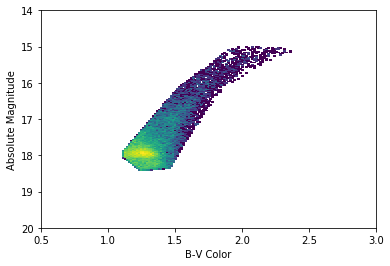

In [13]:
fig = plt.figure()
plt.hist2d(df['bp_rp'][cutind1],df['phot_g_mean_mag'][cutind1],(200,200), [[0,3],[15,20]],norm=mpl.colors.LogNorm())
plt.ylim([20,14])
plt.xlim([0.5,3])
plt.xlabel('B-V Color')
plt.ylabel('Absolute Magnitude')
#%matplotlib inline

In [14]:
df2=df[cutind1]

In [15]:
pd2=np.where(np.isfinite(df2['pmra']) & np.isfinite(df2['pmdec']))

(-10, 10)

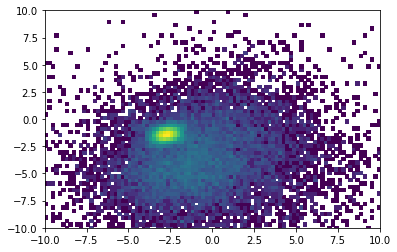

In [16]:
plt.hist2d(df2['pmra'][pd2],df2['pmdec'][pd2], (400,400),norm=mpl.colors.LogNorm())
plt.xlim(-10,10)
plt.ylim(-10,10)

In [17]:
medpmra = -2.701613
medpmdec = -1.369048

In [18]:
gd3=np.where(np.sqrt((((df['pmra'] - medpmra)**2) + ((df['pmdec'] - medpmdec)**2))) <=1.0) 

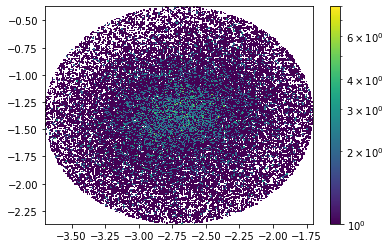

In [19]:
plt.hist2d(df['pmra'][gd3],df['pmdec'][gd3], (400,400),norm=mpl.colors.LogNorm())
plt.colorbar()

Text(0, 0.5, 'Absolute Magnitude')

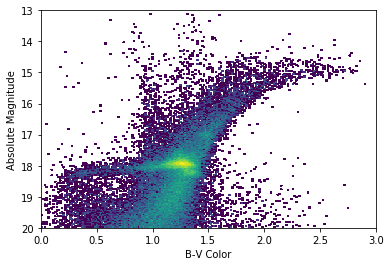

In [20]:
fig = plt.figure()
plt.hist2d(df['bp_rp'][gd3],df['phot_g_mean_mag'][gd3],(200,200), [[0,3],[13,20]],norm=mpl.colors.LogNorm())
plt.ylim([20,13])
plt.xlabel('B-V Color')
plt.ylabel('Absolute Magnitude')

In [21]:
xcut = [1.300403, 1.475806, 1.500000, 1.723790, 2.050403, 2.346774, 2.316532, 1.772177, 1.439516, 1.131048, 0.852823, 0.272177, 0.193548, 0.786290, 1.004032, 0.931452, 0.604839]
ycut = [19.958333, 18.348485, 17.799242, 16.587121, 15.583333, 15.242424, 14.863636, 14.939394, 16.094697, 17.515152, 17.685606, 17.950758, 18.481061, 18.329545, 18.348485, 18.897727, 19.920455]
x=df['bp_rp'][gd3]
y=df['phot_g_mean_mag'][gd3]
(ind, cutind) = roi_cut(xcut,ycut,x,y)


Text(0, 0.5, 'Absolute Magnitude')

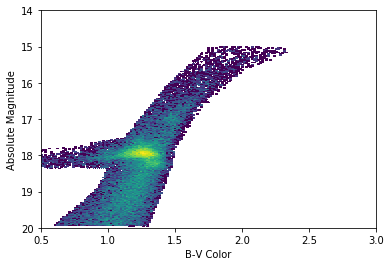

In [22]:
fig = plt.figure()
plt.hist2d(df['bp_rp'][gd3][cutind],df['phot_g_mean_mag'][gd3][cutind],(200,200), [[0,3],[15,20]],norm=mpl.colors.LogNorm())
plt.ylim([20,14])
plt.xlim([0.5,3])
plt.xlabel('B-V Color')
plt.ylabel('Absolute Magnitude')

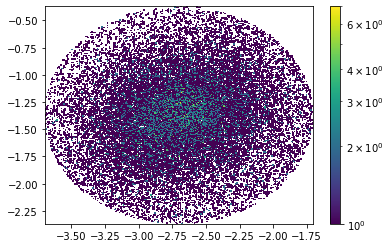

In [23]:
plt.hist2d(df['pmra'][gd3][cutind],df['pmdec'][gd3][cutind], (400,400),norm=mpl.colors.LogNorm())
plt.colorbar()

In [24]:
## bright spot cuts and then make cmd 

## parallax vs g mag
## colored with total proper motion 

In [25]:
df3 = df[gd3]

(-15, 15)

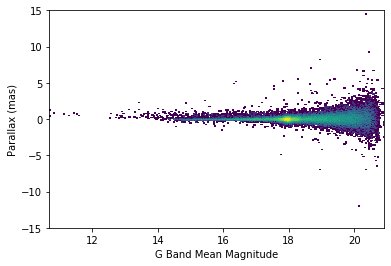

In [30]:
fig = plt.figure()
plt.hist2d(df3['phot_g_mean_mag'],df3['parallax'],(300,300), norm=mpl.colors.LogNorm())
plt.ylabel('Parallax (mas)')
plt.xlabel('G Band Mean Magnitude')
plt.ylim([-15,15])

In [31]:
df4 = df3[cutind]

(-5, 5)

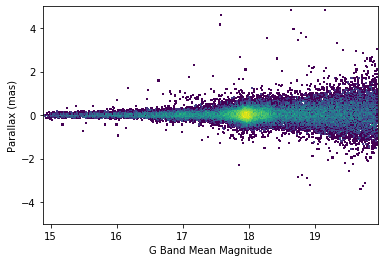

In [47]:
fig = plt.figure()
plt.hist2d(df4['phot_g_mean_mag'],df4['parallax'],(300,300), norm=mpl.colors.LogNorm())
plt.ylabel('Parallax (mas)')
plt.xlabel('G Band Mean Magnitude')
plt.ylim([-5,5])

In [49]:
df4['pmdist'] = np.sqrt((df4['pmra']**2) + (df4['pmdec']**2))

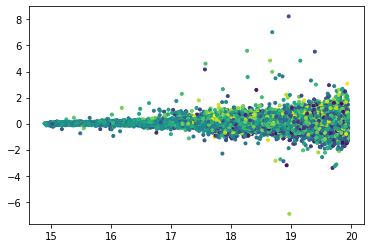

In [52]:
plt.scatter(df4['phot_g_mean_mag'],df4['parallax'],marker=".", c=df4['pmdist'])